In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shared-bikes-demand-prediction/day.csv
/kaggle/input/shared-bikes-demand-prediction/test.csv


In [18]:
train=pd.read_csv("/kaggle/input/shared-bikes-demand-prediction/day.csv")
test=pd.read_csv("/kaggle/input/shared-bikes-demand-prediction/test.csv")

In [19]:
train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


In [21]:
train.shape

(499, 16)

In [22]:
data=train.drop(['instant'],axis=1)

In [23]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      499 non-null    object 
 1   season      499 non-null    int64  
 2   yr          499 non-null    int64  
 3   mnth        499 non-null    int64  
 4   holiday     499 non-null    int64  
 5   weekday     499 non-null    int64  
 6   workingday  499 non-null    int64  
 7   weathersit  499 non-null    int64  
 8   temp        499 non-null    float64
 9   atemp       499 non-null    float64
 10  hum         499 non-null    float64
 11  windspeed   499 non-null    float64
 12  casual      499 non-null    int64  
 13  registered  499 non-null    int64  
 14  cnt         499 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 58.6+ KB


In [29]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

[]

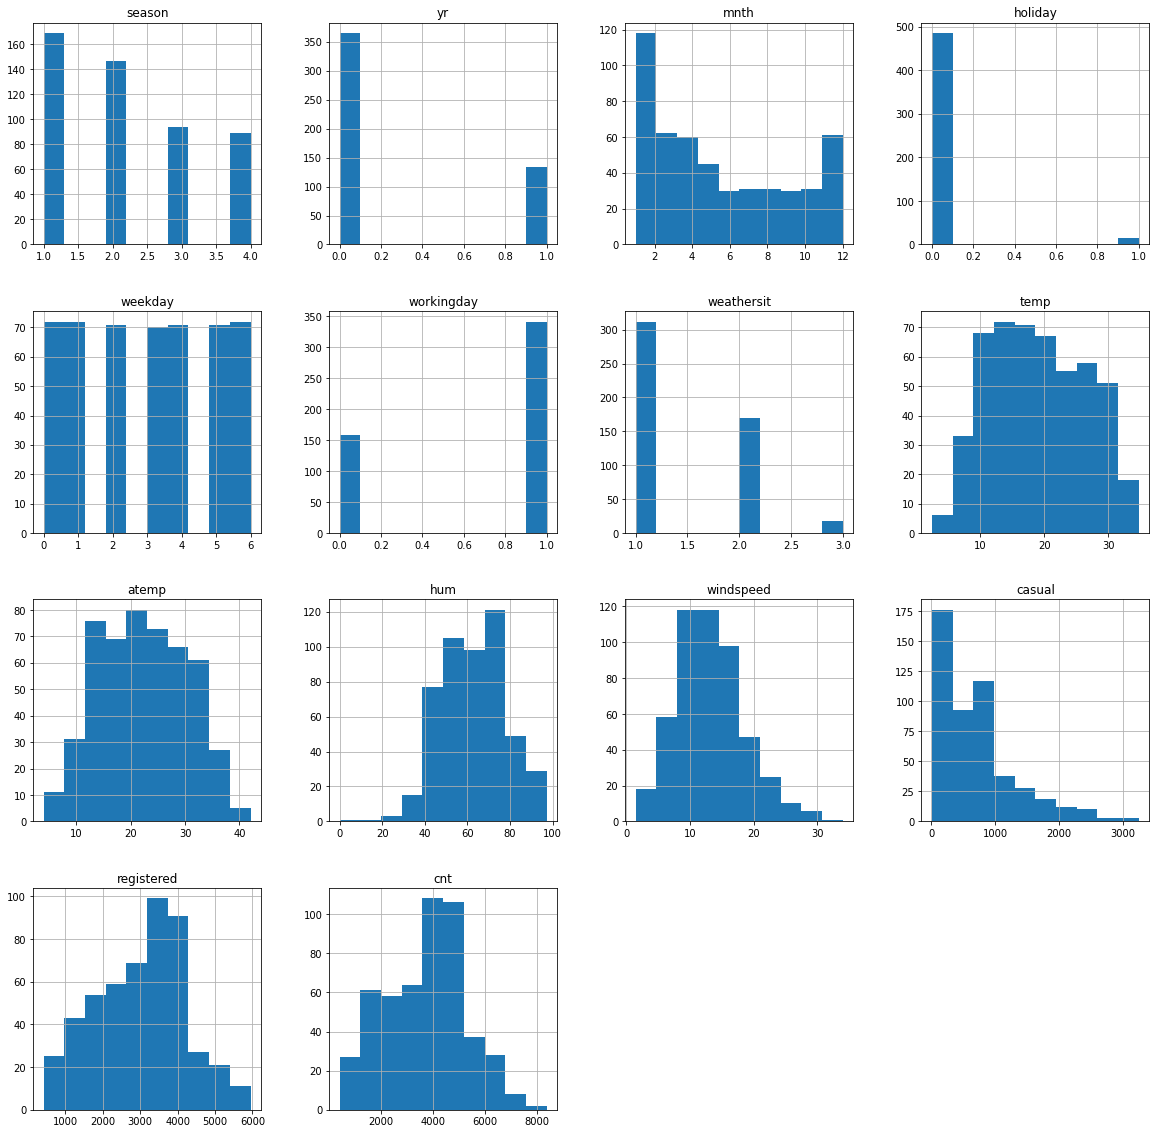

In [30]:
data.hist(figsize=(20,20))
plt.plot()

In [36]:
data['dteday'].nunique()

499

In [37]:
data=data.drop(['dteday'],axis=1)

In [38]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [39]:
data['season'].nunique()

4

In [40]:
data['season'].unique()

array([1, 2, 3, 4])

<AxesSubplot:xlabel='season', ylabel='cnt'>

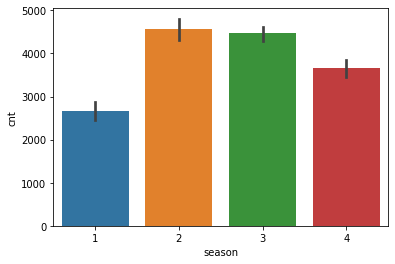

In [41]:
sns.barplot(data['season'],data['cnt'])

<AxesSubplot:xlabel='cnt'>

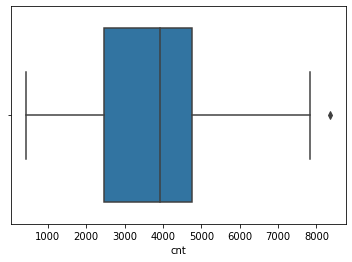

In [43]:
sns.boxplot(data['cnt'])

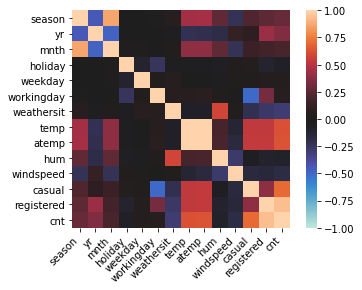

In [49]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

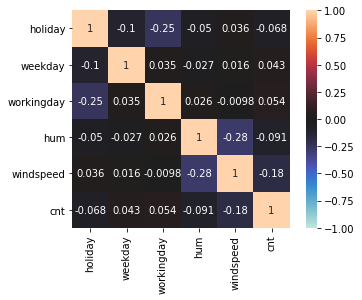

In [51]:
new=[data['holiday'],data['weekday'],data['workingday'],data['hum'],data['windspeed'],data['cnt']]
df = pd. concat(new, axis=1)
corr1 = df.corr()
ax = sns.heatmap(
    corr1, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)



In [52]:
data=data.drop(['holiday','weekday','workingday','hum'],axis=1)

In [53]:
data.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered,cnt
0,1,0,1,2,14.110847,18.18125,10.749882,331,654,985
1,1,0,1,2,14.902598,17.68695,16.652113,131,670,801
2,1,0,1,1,8.050924,9.47025,16.636703,120,1229,1349
3,1,0,1,1,8.200000,10.60610,10.739832,108,1454,1562
4,1,0,1,1,9.305237,11.46350,12.522300,82,1518,1600


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      499 non-null    int64  
 1   yr          499 non-null    int64  
 2   mnth        499 non-null    int64  
 3   weathersit  499 non-null    int64  
 4   temp        499 non-null    float64
 5   atemp       499 non-null    float64
 6   windspeed   499 non-null    float64
 7   casual      499 non-null    int64  
 8   registered  499 non-null    int64  
 9   cnt         499 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 39.1 KB


In [55]:
data.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered,cnt
0,1,0,1,2,14.110847,18.18125,10.749882,331,654,985
1,1,0,1,2,14.902598,17.68695,16.652113,131,670,801
2,1,0,1,1,8.050924,9.47025,16.636703,120,1229,1349
3,1,0,1,1,8.200000,10.60610,10.739832,108,1454,1562
4,1,0,1,1,9.305237,11.46350,12.522300,82,1518,1600


In [65]:
a=['temp','atemp','windspeed']
for i in a:
    print(str(i)+": "+str(data[i].mean()))

temp: 18.97932523326653
atemp: 22.316515501001973
windspeed: 13.21251305410821


<AxesSubplot:xlabel='temp', ylabel='Density'>

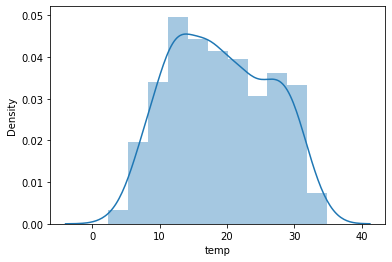

In [67]:
sns.distplot(data['temp'])

<AxesSubplot:xlabel='temp'>

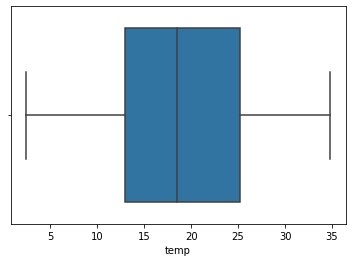

In [60]:
sns.boxplot(data['temp'])

<AxesSubplot:xlabel='atemp', ylabel='Density'>

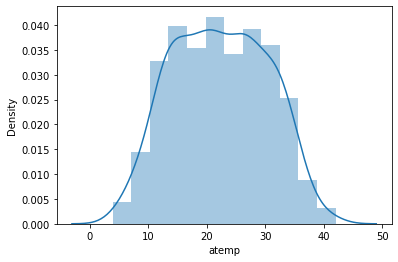

In [68]:
sns.distplot(data['atemp'])

<AxesSubplot:xlabel='atemp'>

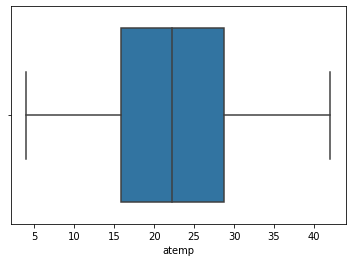

In [70]:
sns.boxplot(data['atemp'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

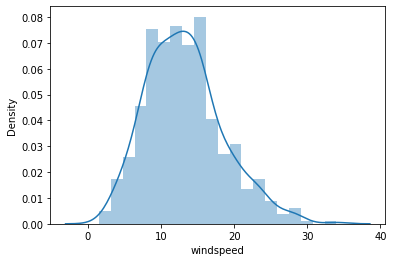

In [71]:
sns.distplot(data['windspeed'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

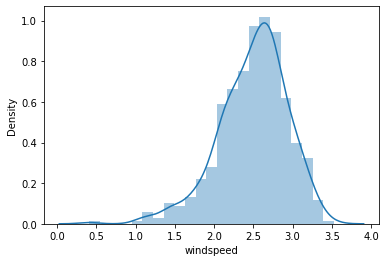

In [72]:
sns.distplot(np.log(data['windspeed']))

In [73]:
data['windspeed'].skew()

0.5966280843644785

In [74]:
np.log(data['windspeed']).skew()

-0.7454294340878558

In [75]:
a=['temp','atemp','windspeed']
for i in a:
    print(str(i)+": "+str(data[i].skew()))

temp: 0.1128843668912657
atemp: 0.026086076915936344
windspeed: 0.5966280843644785


<AxesSubplot:xlabel='windspeed'>

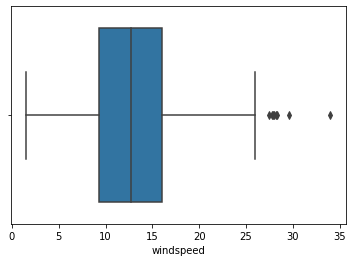

In [76]:
sns.boxplot(data['windspeed'])

In [87]:
def tukeys_method(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [92]:
s,b=tukeys_method(data,'windspeed')
print("probable : "+str(s))
print("possible : "+str(b))

probable : []
possible : [44, 49, 292, 382, 407, 420, 431, 432]


In [93]:
for i in b:
    data['windspeed'][i]=data['windspeed'].median()

<AxesSubplot:xlabel='windspeed'>

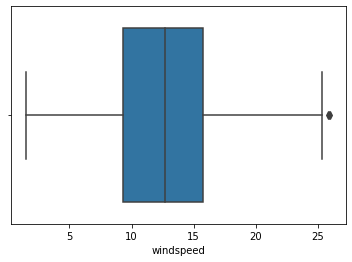

In [94]:
sns.boxplot(data['windspeed'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

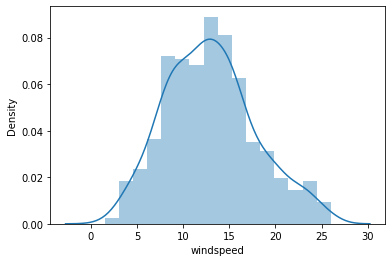

In [95]:
sns.distplot(data['windspeed'])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      499 non-null    int64  
 1   yr          499 non-null    int64  
 2   mnth        499 non-null    int64  
 3   weathersit  499 non-null    int64  
 4   temp        499 non-null    float64
 5   atemp       499 non-null    float64
 6   windspeed   499 non-null    float64
 7   casual      499 non-null    int64  
 8   registered  499 non-null    int64  
 9   cnt         499 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 39.1 KB


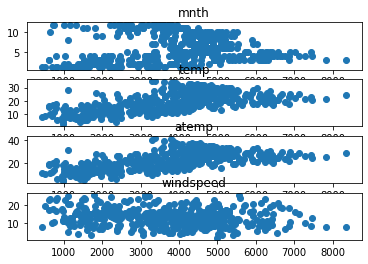

In [112]:
fig,ax=plt.subplots(4)
c=['mnth','temp','atemp','windspeed']
for i in range(len(c)):
    ax[i].scatter(data['cnt'],data[c[i]])
    ax[i].set_title(c[i])
plt.show()

In [109]:
data.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered,cnt
0,1,0,1,2,14.110847,18.18125,10.749882,331,654,985
1,1,0,1,2,14.902598,17.68695,16.652113,131,670,801
2,1,0,1,1,8.050924,9.47025,16.636703,120,1229,1349
3,1,0,1,1,8.200000,10.60610,10.739832,108,1454,1562
4,1,0,1,1,9.305237,11.46350,12.522300,82,1518,1600


In [115]:
data['yr'].unique()

array([0, 1])

<AxesSubplot:xlabel='yr', ylabel='cnt'>

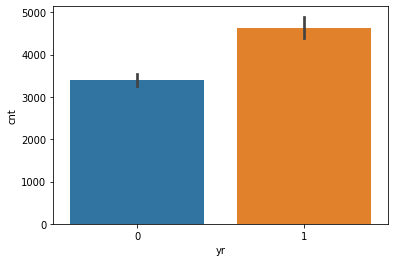

In [117]:
sns.barplot(data['yr'],data['cnt'])

<AxesSubplot:xlabel='season', ylabel='cnt'>

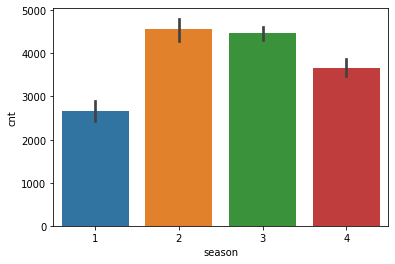

In [118]:
sns.barplot(data['season'],data['cnt'])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

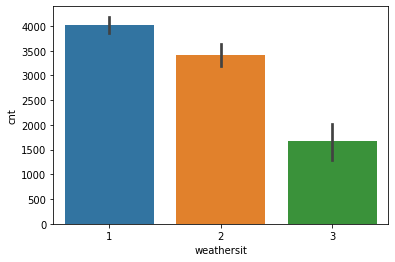

In [119]:
sns.barplot(data['weathersit'],data['cnt'])

In [120]:
data['casual'].nunique()

430

In [121]:
data['registered'].nunique()

473

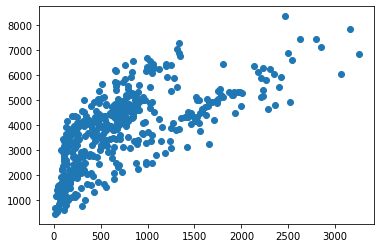

In [122]:
plt.scatter(data['casual'],data['cnt'])

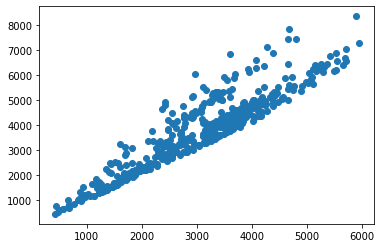

In [123]:
plt.scatter(data['registered'],data['cnt'])

<AxesSubplot:xlabel='casual', ylabel='Density'>

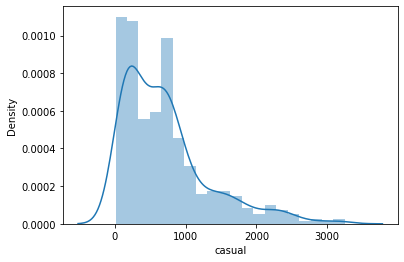

In [126]:
sns.distplot(data['casual'])

<AxesSubplot:xlabel='casual', ylabel='Density'>

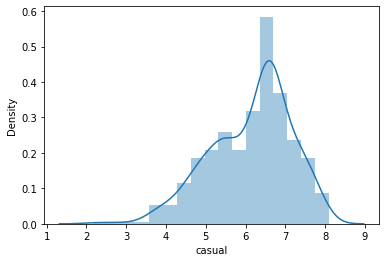

In [128]:
sns.distplot(np.log(data['casual']))

<AxesSubplot:xlabel='casual'>

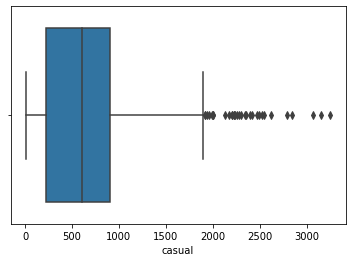

In [129]:
sns.boxplot(data['casual'])

<AxesSubplot:xlabel='casual'>

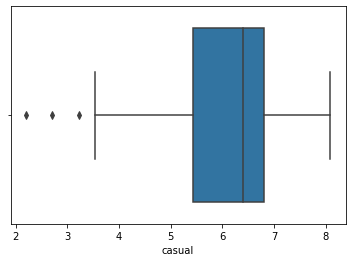

In [130]:
sns.boxplot(np.log(data['casual']))

In [131]:
data['casual']=np.log(data['casual'])

<AxesSubplot:xlabel='registered', ylabel='Density'>

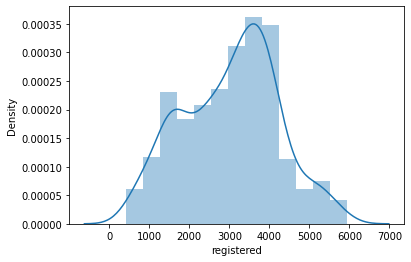

In [132]:
sns.distplot(data['registered'])

<AxesSubplot:xlabel='registered'>

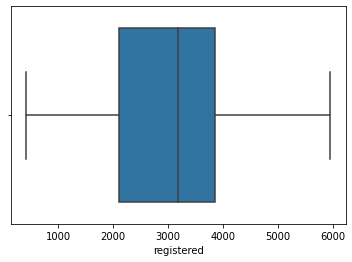

In [134]:
sns.boxplot(data['registered'])

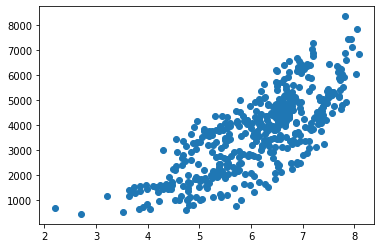

In [135]:
plt.scatter(data['casual'],data['cnt'])

In [136]:
data.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered,cnt
0,1,0,1,2,14.110847,18.18125,10.749882,5.802118,654,985
1,1,0,1,2,14.902598,17.68695,16.652113,4.875197,670,801
2,1,0,1,1,8.050924,9.47025,16.636703,4.787492,1229,1349
3,1,0,1,1,8.200000,10.60610,10.739832,4.682131,1454,1562
4,1,0,1,1,9.305237,11.46350,12.522300,4.406719,1518,1600


<AxesSubplot:xlabel='cnt', ylabel='Density'>

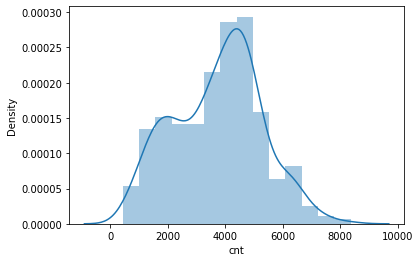

In [137]:
sns.distplot(data['cnt'])

In [139]:
y=data['cnt']
X=data.drop(['cnt'],axis=1)

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [144]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression()

In [145]:
y1=l.predict(X_test)

In [146]:
l.score(X_test,y_test)

0.974907108486954

In [148]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y1))

189.54692807302155


In [150]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y1)
print(r2)

0.974907108486954


In [151]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(random_state=2)
r.fit(X_train,y_train)

RandomForestRegressor(random_state=2)

In [152]:
y2=r.predict(X_test)

In [153]:
print(r2_score(y_test,y2))

0.9952649352241831


In [154]:
test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


In [155]:
X.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered
0,1,0,1,2,14.110847,18.18125,10.749882,5.802118,654
1,1,0,1,2,14.902598,17.68695,16.652113,4.875197,670
2,1,0,1,1,8.050924,9.47025,16.636703,4.787492,1229
3,1,0,1,1,8.200000,10.60610,10.739832,4.682131,1454
4,1,0,1,1,9.305237,11.46350,12.522300,4.406719,1518


In [160]:
test.shape

(230, 15)

In [156]:
test_data=test.drop(['instant','dteday','holiday','weekday','workingday','hum'],axis=1)

In [158]:
test_data.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered
0,2,1,5,1,26.103347,29.79875,8.208304,991,6433
1,2,1,5,1,24.326653,28.63065,15.374825,1242,6142
2,2,1,5,1,23.130847,27.55605,9.166739,1521,6118
3,2,1,5,1,24.600000,28.34540,5.626325,3410,4884
4,2,1,5,1,25.454153,29.19835,17.042589,2704,4425


In [161]:
test_data.isnull().sum()

season        0
yr            0
mnth          0
weathersit    0
temp          0
atemp         0
windspeed     0
casual        0
registered    0
dtype: int64

In [162]:
test_data['casual']=np.log(test_data['casual'])

In [163]:
test_data.head()

,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered
0,2,1,5,1,26.103347,29.79875,8.208304,6.898715,6433
1,2,1,5,1,24.326653,28.63065,15.374825,7.124478,6142
2,2,1,5,1,23.130847,27.55605,9.166739,7.327123,6118
3,2,1,5,1,24.600000,28.34540,5.626325,8.134468,4884
4,2,1,5,1,25.454153,29.19835,17.042589,7.902487,4425


In [164]:
y_pred=r.predict(test_data)

In [166]:
submission = pd.DataFrame({'instant':test['instant'],'cnt':y_pred})
submission.head()

,instant,cnt
0,501,6764.49
1,502,6807.59
2,503,7110.82
3,504,7535.30
4,505,7009.96
